In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from vocalseg.examples import mouse
from vocalseg.utils import butter_bandpass_filter, spectrogram, int16tofloat32, plot_spec

In [3]:
# load data
rate, data = mouse()
# filter data
data = butter_bandpass_filter(int16tofloat32(data), 30000, 120000, rate)

In [4]:
data = data[rate*4:rate*6]

In [5]:
figsize = (30,3)

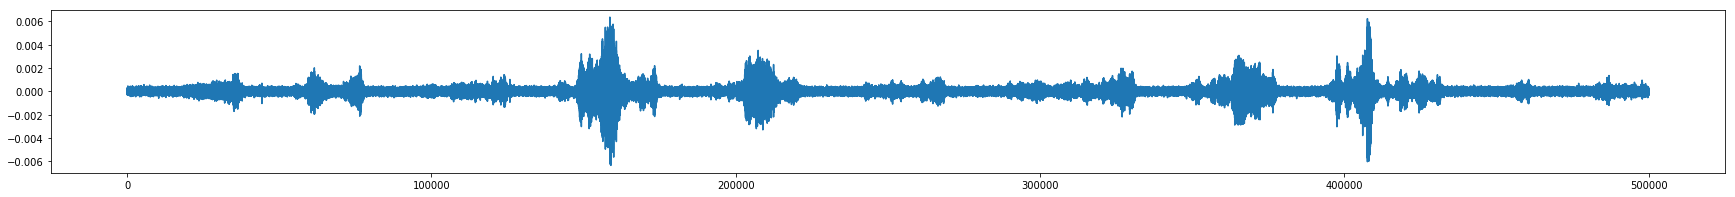

In [6]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(data)

### Generate spectrogram
- view docstrings for more info

In [7]:
### parameters
n_fft=4096 # FFT window size
hop_length_ms=1
win_length_ms=4
ref_level_db=20
pre=0.97
min_level_db=-80
silence_threshold = 0.05
min_silence_for_spec=0.1
max_vocal_for_spec=1.0,
min_syllable_length_s = 0.01
spectral_range = [40000, 100000]
mask_thresh_std = 1.0
neighborhood_thresh=0.5
max_element_len_ms=2000
neighborhood_time_ms=5
neighborhood_freq_hz=2000
temporal_neighbor_merge_distance_ms= 0
overlapping_element_merge_thresh= 0.5
min_element_size_ms_hz = [5, 1000]

In [8]:
spec = spectrogram(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
)
np.shape(spec)

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


(2049, 2001)

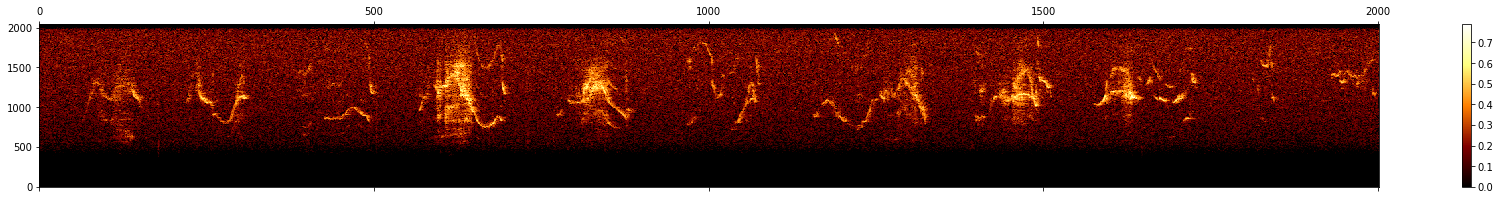

In [9]:
fig, ax = plt.subplots(figsize=figsize)
plot_spec(spec, fig, ax);

### segment vocalization using continuity segmenation

In [10]:
from vocalseg.continuity_filtering import continuity_segmentation

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


longest silence 0.023
longest vocalization 0.15800000000000014
Current min_level_db: -80
longest silence 0.023
longest vocalization 0.15800000000000014
Current min_level_db: -75
longest silence 0.026999999999999996
longest vocalization 0.15800000000000014
Current min_level_db: -70
longest silence 0.07599999999999985
longest vocalization 0.11299999999999999
Current min_level_db: -65
longest silence 0.09599999999999986
longest vocalization 0.10899999999999999
Current min_level_db: -60
longest silence 0.1
longest vocalization 0.07799999999999985
Current min_level_db: -55
longest silence 0.139
longest vocalization 0.06000000000000005


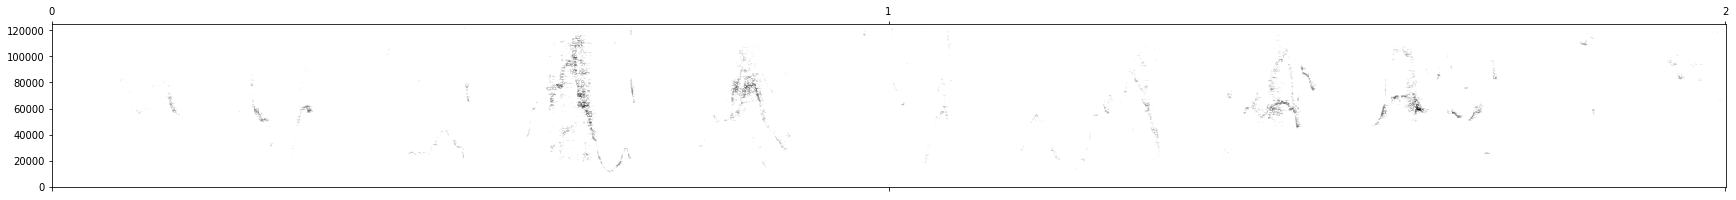

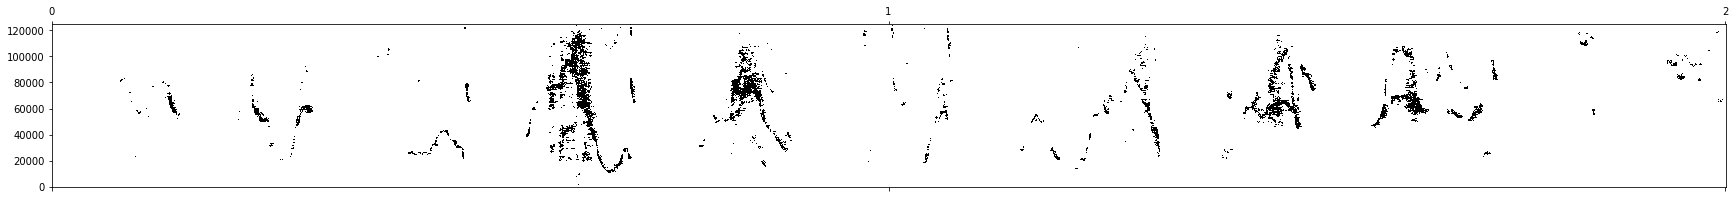

(32, 5)


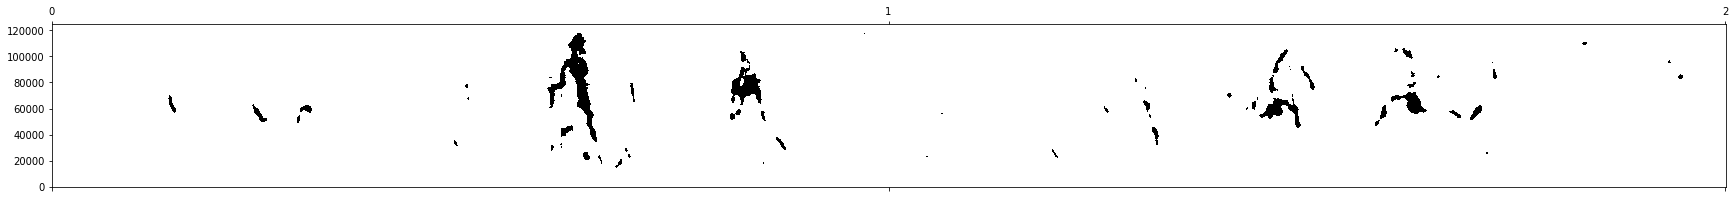

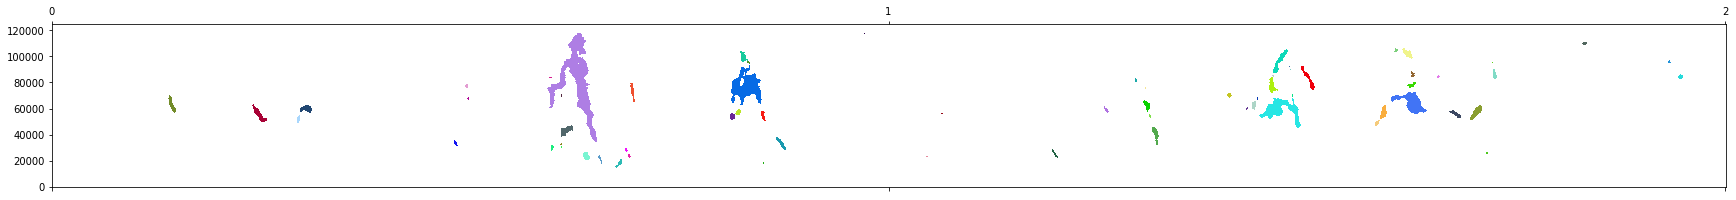

unique elements: 71


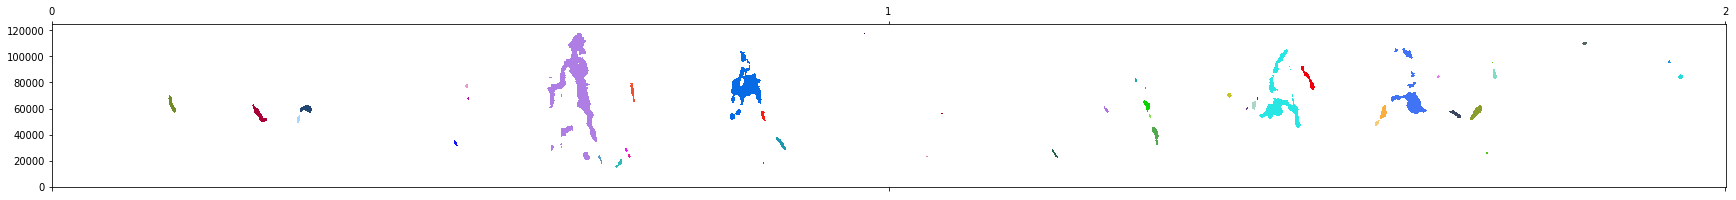

unique elements: 46
82


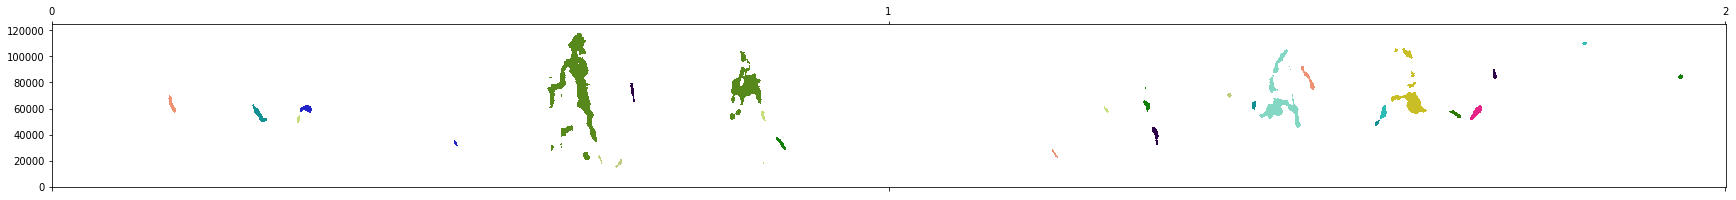

unique elements: 13
-50


In [11]:
results = continuity_segmentation(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
    verbose=True,
    spectral_range = spectral_range,
    mask_thresh_std = mask_thresh_std,
    figsize=figsize,
    neighborhood_thresh=neighborhood_thresh,
    max_element_len_ms = max_element_len_ms,
    neighborhood_time_ms=neighborhood_time_ms,
    neighborhood_freq_hz=neighborhood_freq_hz,
    temporal_neighbor_merge_distance_ms= 0, #10,
    overlapping_element_merge_thresh= 0.5,
    min_element_size_ms_hz = [5, 1000]
)
print(results['min_level_db'])

In [12]:
from vocalseg.continuity_filtering import plot_labelled_elements

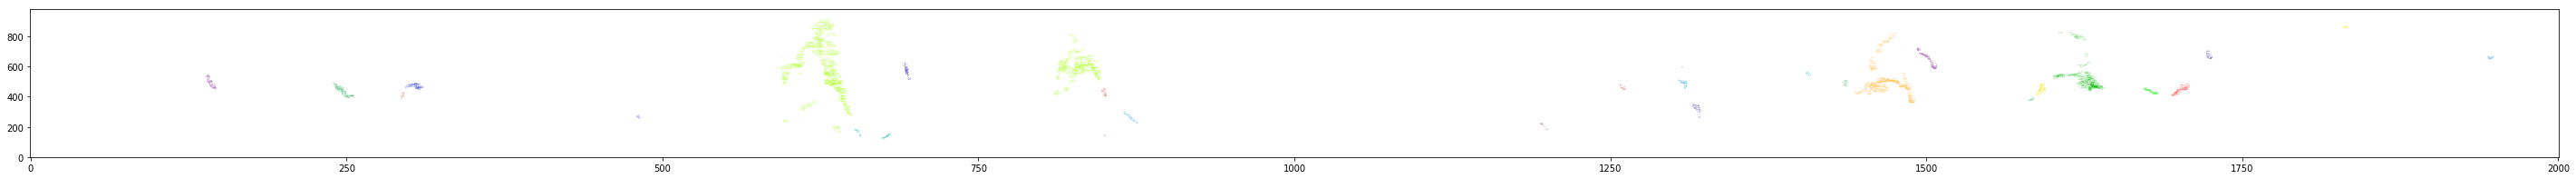

In [13]:
labelled_spec = plot_labelled_elements(results['elements'], results['spec'], figsize=(50,3)); 

### same thing without joining overlapping elements

longest silence 0.023
longest vocalization 0.15800000000000014
Current min_level_db: -80
longest silence 0.023
longest vocalization 0.15800000000000014
Current min_level_db: -75
longest silence 0.026999999999999996
longest vocalization 0.15800000000000014
Current min_level_db: -70
longest silence 0.07599999999999985
longest vocalization 0.11299999999999999


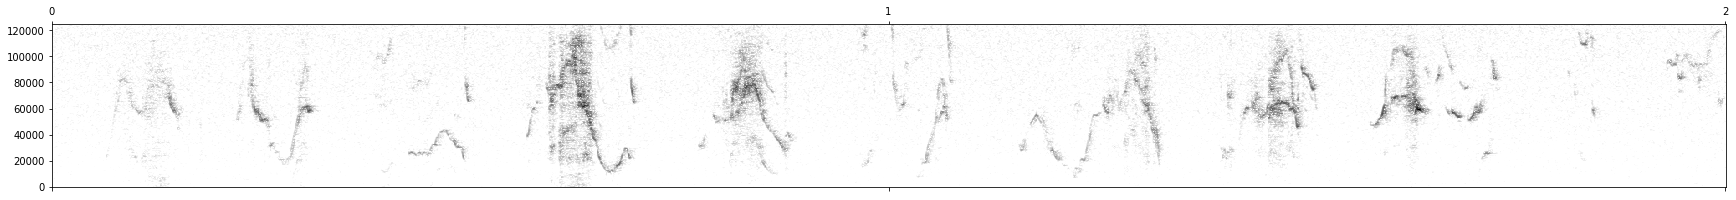

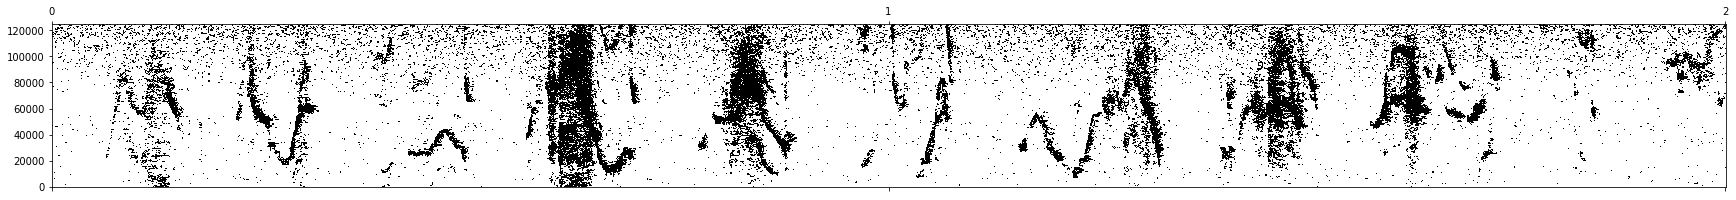

(32, 5)


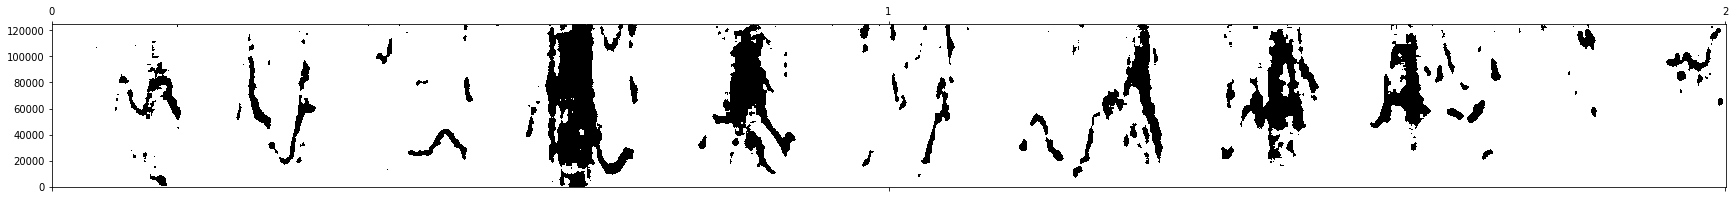

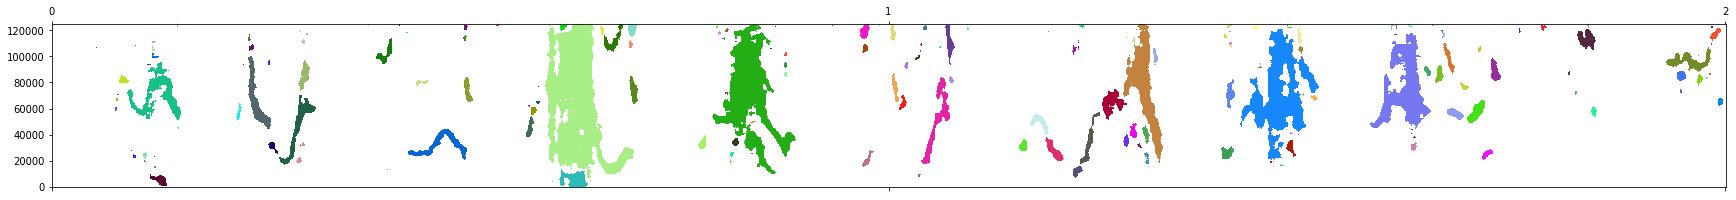

unique elements: 227
82


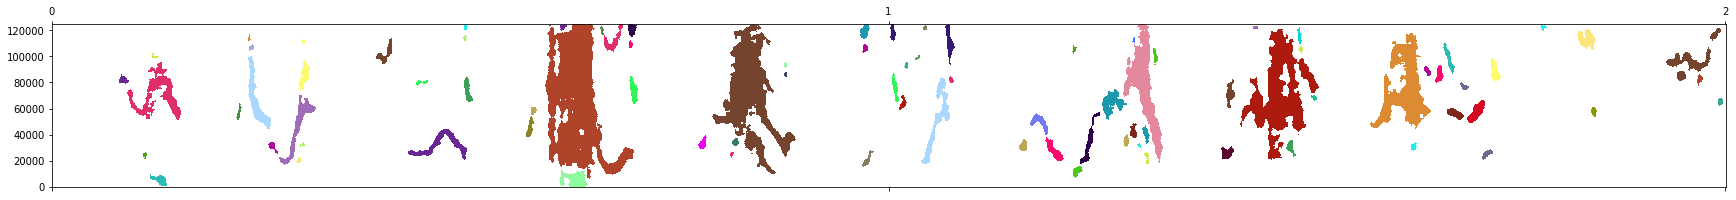

unique elements: 45
-65


In [17]:
### parameters
n_fft=4096 # FFT window size
hop_length_ms=1
win_length_ms=4
ref_level_db=20
pre=0.97
min_level_db=-80
silence_threshold = 0.05
min_silence_for_spec=0.05
max_vocal_for_spec=1.0,
min_syllable_length_s = 0.01
spectral_range = [40000, 100000]
mask_thresh_std = 1.0
neighborhood_thresh=0.5
max_element_len_ms=2000
neighborhood_time_ms=5
neighborhood_freq_hz=2000
temporal_neighbor_merge_distance_ms= 0
overlapping_element_merge_thresh= 0.5
min_element_size_ms_hz = [5, 1000]


results = continuity_segmentation(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    silence_threshold=silence_threshold,
    min_level_db=min_level_db,
    verbose=True,
    min_syllable_length_s = min_syllable_length_s,
    min_silence_for_spec = min_silence_for_spec,
    spectral_range = spectral_range,
    mask_thresh_std = mask_thresh_std,
    figsize=figsize,
    neighborhood_thresh=neighborhood_thresh,
    max_element_len_ms = max_element_len_ms,
    neighborhood_time_ms=neighborhood_time_ms,
    neighborhood_freq_hz=neighborhood_freq_hz,
    temporal_neighbor_merge_distance_ms= 0,
    overlapping_element_merge_thresh= np.inf,
    min_element_size_ms_hz = [5, 1000]
)
print(results['min_level_db'])

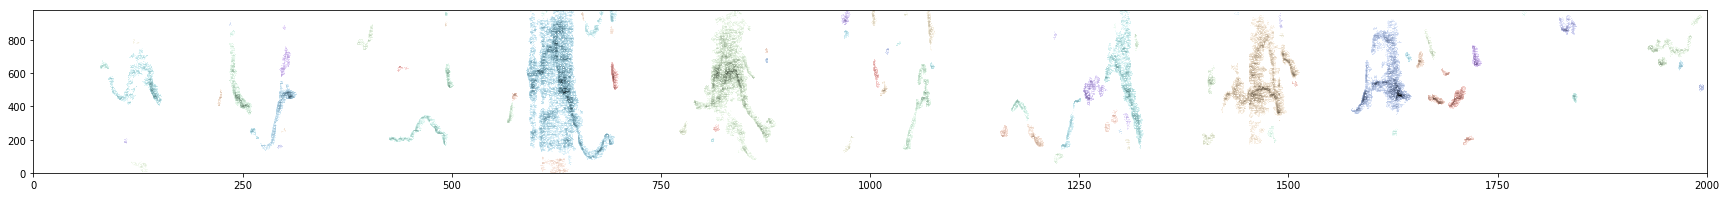

In [114]:
labelled_spec = plot_labelled_elements(results['elements'], results['spec'], background='white', figsize=(30,3)); 

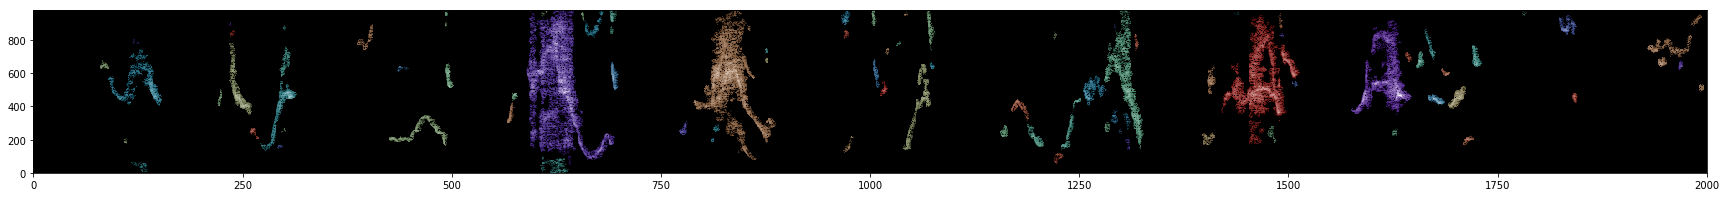

In [111]:
labelled_spec = plot_labelled_elements(results['elements'], results['spec'], background='black', figsize=(30,3)); 

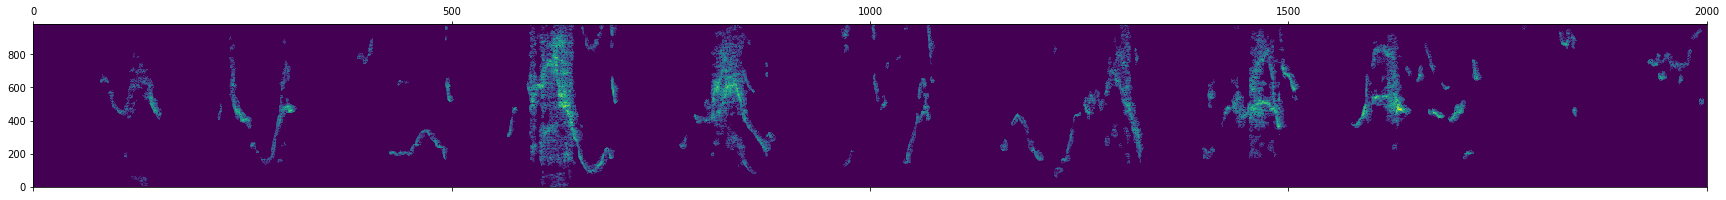

In [58]:
fig, ax = plt.subplots(figsize=figsize)
ax.matshow(new_spec[:,:,3], interpolation=None, aspect="auto", origin="lower")